# Q6.
**Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the
performance of clusters by changing the parameters involved in the algorithms.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Iris.csv")
x=df.drop('Species',axis=1)

**Orginal Dataset Label Distribution**

In [3]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Mapping labels with 0,1,2**

In [4]:
abc={'Iris-setosa':0,'Iris-virginica':2,'Iris-versicolor':1}
y_ori=df['Species'].map(abc)
y_ori

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# Decomposing 4 features into 2 for better Visulization 

In [5]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
x_pca= pca.fit_transform(x)

# New Decomposed Dataframe

In [6]:
df_=pd.DataFrame(x_pca)
df_

,0,1
0,74.547527,0.441426
1,73.549143,0.309342
2,72.557120,0.084528
3,71.551791,0.160353
4,70.552763,0.227636
...,...,...
145,-70.519741,-0.954230
146,-71.501906,-1.460988
147,-72.510533,-1.218025
148,-73.515887,-1.165059


# Applying Elbow Method to find optimal K

In [7]:
from sklearn.cluster import KMeans 

wcss = [] 
  
# Using Elbow method to determine 
# the proper n(no of clusters) 

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    random_state=0) 
    kmeans.fit(df_) 
    wcss.append(kmeans.inertia_) 

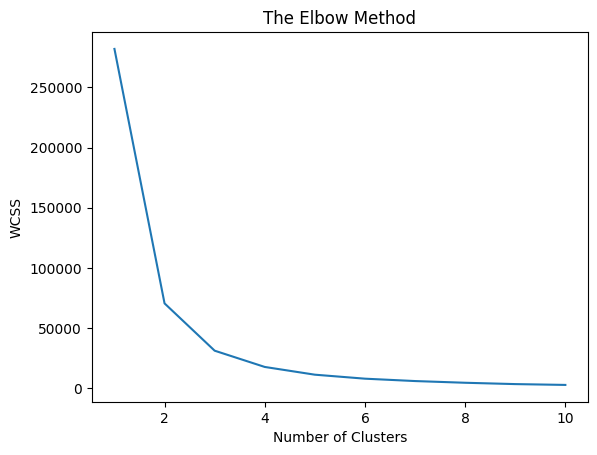

In [8]:
plt.plot(range(1, 11), wcss) 
plt.title('The Elbow Method') 
plt.xlabel('Number of Clusters') 
plt.ylabel('WCSS') 
plt.show() 


# using the Optimal k value for Clustering Unlabelled data into K labels

In [9]:
kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0) 
y_kmeans = kmeans.fit_predict(df_) 

In [10]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
df_['Species']=y_kmeans

In [12]:
df_['Species_ori']=y_ori

In [13]:
df_['Species_ori'].value_counts()

Species_ori
0    50
1    50
2    50
Name: count, dtype: int64

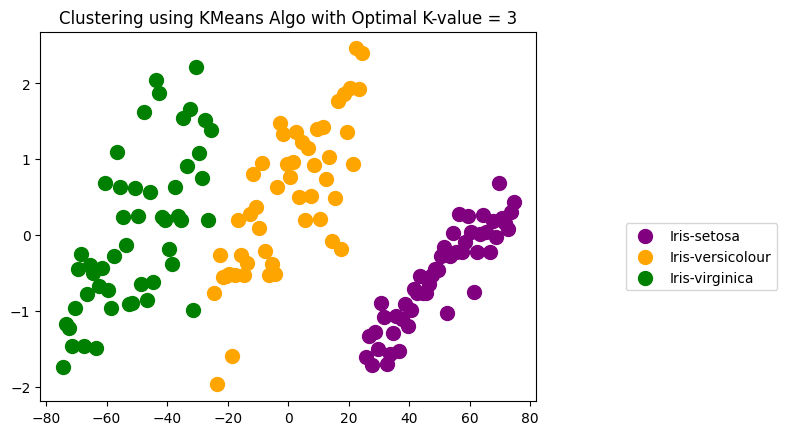

In [14]:
plt.scatter(df_[df_['Species']==0][0], 
            df_[df_['Species']==0][1], 
            s=100, c='purple', 
            label='Iris-setosa') 
plt.scatter(df_[df_['Species']==1][0], 
            df_[df_['Species']==1][1], 
            s=100, c='orange', 
            label='Iris-versicolour') 
plt.scatter(df_[df_['Species']==2][0], 
            df_[df_['Species']==2][1], 
            s=100, c='green', 
            label='Iris-virginica') 

plt.title("Clustering using KMeans Algo with Optimal K-value = 3")
plt.legend(bbox_to_anchor=[1.5,0.5])


# Original Dataset label cluster

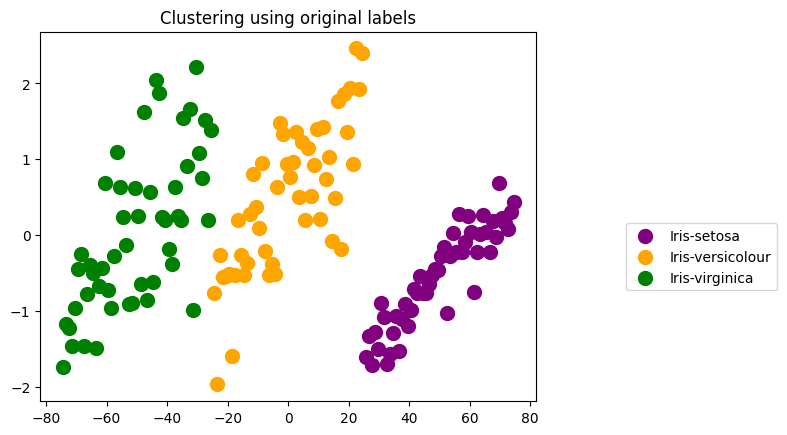

In [15]:
plt.scatter(df_[df_['Species_ori']==0][0], 
            df_[df_['Species_ori']==0][1], 
            s=100, c='purple', 
            label='Iris-setosa') 
plt.scatter(df_[df_['Species_ori']==1][0], 
            df_[df_['Species_ori']==1][1], 
            s=100, c='orange', 
            label='Iris-versicolour') 
plt.scatter(df_[df_['Species_ori']==2][0], 
            df_[df_['Species_ori']==2][1], 
            s=100, c='green', 
            label='Iris-virginica') 

plt.title("Clustering using original labels")
plt.legend(bbox_to_anchor=[1.5,0.5])


**we can see that , K means is succesfully clustering the 3 given labels into nearly accurate labels, performing the best AMONG other classifiers**

# Agglomerative Clustering

In [16]:
df_aglo=pd.DataFrame(x_pca)

In [17]:
df_aglo

,0,1
0,74.547527,0.441426
1,73.549143,0.309342
2,72.557120,0.084528
3,71.551791,0.160353
4,70.552763,0.227636
...,...,...
145,-70.519741,-0.954230
146,-71.501906,-1.460988
147,-72.510533,-1.218025
148,-73.515887,-1.165059


In [18]:

from sklearn.cluster import AgglomerativeClustering 
  
aglo = AgglomerativeClustering(n_clusters=3,linkage='ward',) 
aglo.fit(df_aglo) 
aglo_labels = aglo.labels_ 
  
# Visualizing first 10 labels.. 
# labels defines cluster to which 
# data point is assigned to 
aglo_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [19]:
df_aglo['Species']=aglo_labels

In [20]:
df_aglo

,0,1,Species
0,74.547527,0.441426,0
1,73.549143,0.309342,0
2,72.557120,0.084528,0
3,71.551791,0.160353,0
4,70.552763,0.227636,0
...,...,...,...
145,-70.519741,-0.954230,2
146,-71.501906,-1.460988,2
147,-72.510533,-1.218025,2
148,-73.515887,-1.165059,2


In [21]:
df_aglo['Species'].value_counts()

Species
0    66
1    47
2    37
Name: count, dtype: int64

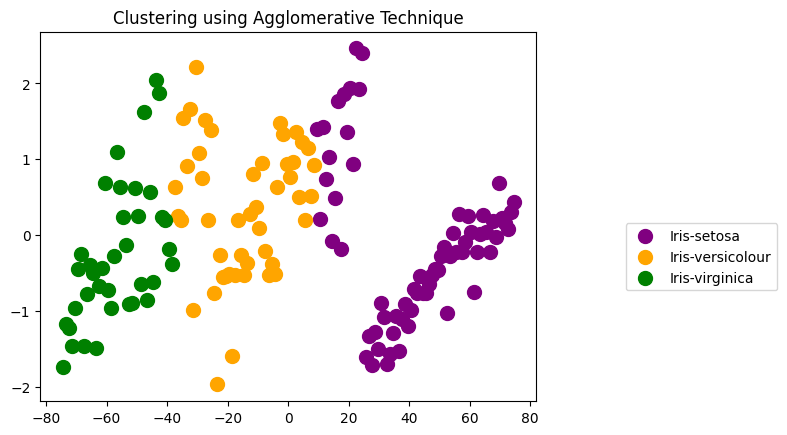

In [22]:
plt.scatter(df_aglo[df_aglo['Species']==0][0], 
            df_aglo[df_aglo['Species']==0][1], 
            s=100, c='purple', 
            label='Iris-setosa') 
plt.scatter(df_aglo[df_aglo['Species']==1][0], 
            df_aglo[df_aglo['Species']==1][1], 
            s=100, c='orange', 
            label='Iris-versicolour') 
plt.scatter(df_aglo[df_aglo['Species']==2][0], 
            df_aglo[df_aglo['Species']==2][1], 
            s=100, c='green', 
            label='Iris-virginica') 

plt.title("Clustering using Agglomerative Technique")
plt.legend(bbox_to_anchor=[1.5,0.5])


**While the data points are not quite as accurate as K means, we can see that they are close to the original labels.**

In [23]:
iris = datasets.load_iris()

data_y = pd.DataFrame(iris.target)
data_y.columns=['origianl_label']

data_X = pd.DataFrame(iris.data)
data_X.columns=['Sepal length','Sepal width','Petal length','Petal width']

train = pd.concat([data_X,data_y],axis=1)

train.head()

,Sepal length,Sepal width,Petal length,Petal width,origianl_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
X = train.drop('origianl_label',axis=1)
y = train['origianl_label']

In [25]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred = dbscan.fit_predict(X)
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [26]:
dbs= pca.fit_transform(X)
df_dbs=pd.DataFrame(dbs)
df_dbs['Species']=y_pred
df_dbs

,0,1,Species
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,1
146,1.527167,-0.375317,1
147,1.764346,0.078859,1
148,1.900942,0.116628,1


In [27]:
df_dbs['Species'].value_counts()

Species
 1    84
 0    49
-1    17
Name: count, dtype: int64

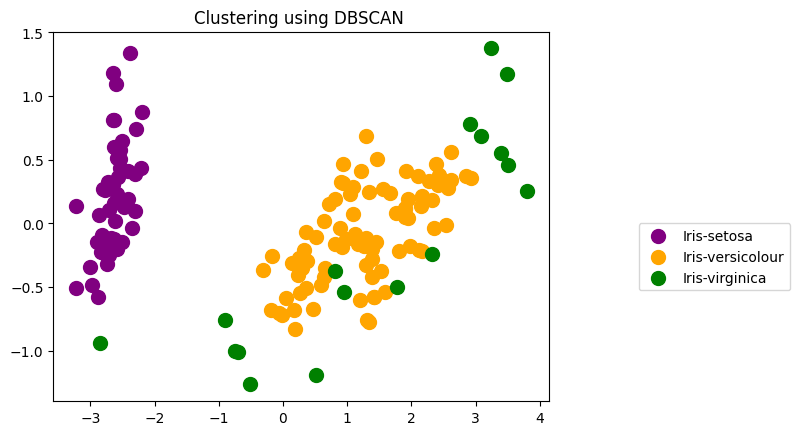

In [28]:
plt.scatter(df_dbs[df_dbs['Species']==0][0], 
            df_dbs[df_dbs['Species']==0][1], 
            s=100, c='purple', 
            label='Iris-setosa') 
plt.scatter(df_dbs[df_dbs['Species']==1][0], 
            df_dbs[df_dbs['Species']==1][1], 
            s=100, c='orange', 
            label='Iris-versicolour') 
plt.scatter(df_dbs[df_dbs['Species']==-1][0], 
            df_dbs[df_dbs['Species']==-1][1], 
            s=100, c='green', 
            label='Iris-virginica') 

plt.title("Clustering using DBSCAN ")
plt.legend(bbox_to_anchor=[1.5,0.5])


In [29]:
df_dbs['Species_ori']=y
df_dbs.head()

,0,1,Species,Species_ori
0,-2.684126,0.319397,0,0
1,-2.714142,-0.177001,0,0
2,-2.888991,-0.144949,0,0
3,-2.745343,-0.318299,0,0
4,-2.728717,0.326755,0,0


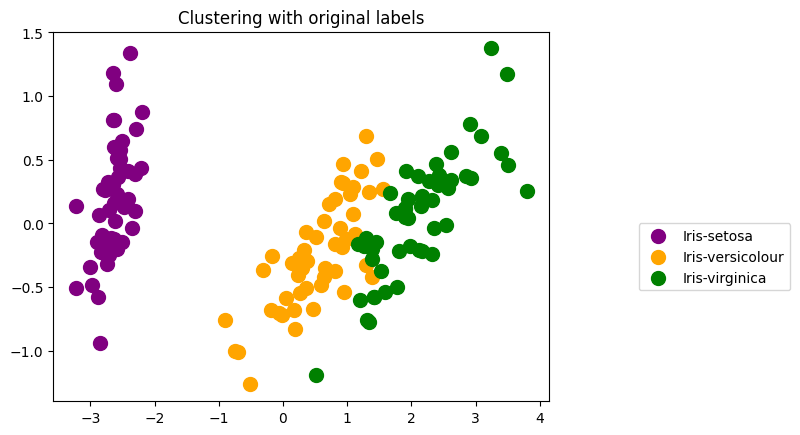

In [30]:
plt.scatter(df_dbs[df_dbs['Species_ori']==0][0], 
            df_dbs[df_dbs['Species_ori']==0][1], 
            s=100, c='purple', 
            label='Iris-setosa') 
plt.scatter(df_dbs[df_dbs['Species_ori']==1][0], 
            df_dbs[df_dbs['Species_ori']==1][1], 
            s=100, c='orange', 
            label='Iris-versicolour') 
plt.scatter(df_dbs[df_dbs['Species_ori']==2][0], 
            df_dbs[df_dbs['Species_ori']==2][1], 
            s=100, c='green', 
            label='Iris-virginica') 

plt.title("Clustering with original labels")
plt.legend(bbox_to_anchor=[1.5,0.5])


**Among the three classifiers, DBSCAN clustering performs the worst; this is evident when we compare the original with the above cluster of predicted values.**